In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Generamos los valroes de los puntos del perfil de velocidades
z=[0,1.5,3.5,6.5,8.75]
V=[0,0.43,0.62,0.86,1.05]

In [3]:
# Graficamos la distribucion de velocidades
plt.figure(figsize=(10, 7))
plt.plot(V,z,'o',color='red')
plt.title("Perfil de velocidades Streamwise",fontsize=14)
plt.grid()
plt.xlabel('Velocidad [m/s]',fontsize=13)
plt.ylabel('Profundidad [m]',fontsize=13)

Text(0, 0.5, 'Profundidad [m]')

 
0.3408 x - 4.453


Text(0.5, 0, 'Ln(z/v)')

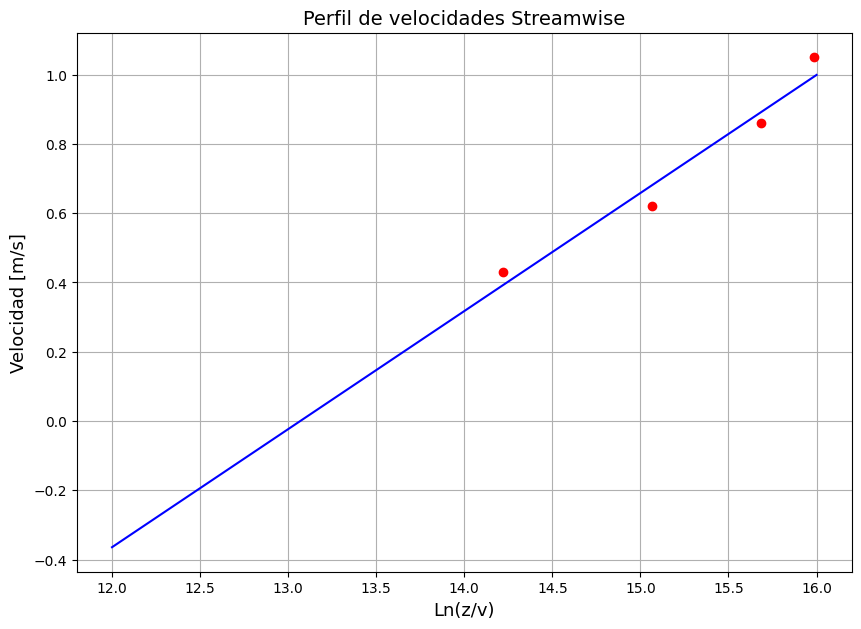

In [4]:
# APLICANDO LA LEY DE PARED #
# ------------------------- #

k=0.40 # Constante de von Karman
v=10**-6 # Viscocidad del agua
rho=1000 # Densidad del agua

z_mas=z[1:] # Valores de alturas sin el 0 para que no afecte en el logaritmo
z_mas=[np.log(z/v) for z in z_mas] # Vlaculo de cada valor de la lista en funcion de ln(z/v)
V_mas=V[1:] # Valores de velocidad sin el 0 para que ambas listan tengan la misma longitud

# Aplicacion de polyfit para obtener la recta ajustada al modelo
Mod_lineal=np.polyfit(z_mas,V_mas,1)
Coef_mod_lineal=np.poly1d(Mod_lineal)
print(Coef_mod_lineal)

# Trazado de la recta con los valores observados
X_ajuste=np.linspace(12,16)
plt.figure(figsize=(10,7))
plt.plot(z_mas,V_mas,'o',color='red')
plt.plot(X_ajuste,Coef_mod_lineal(X_ajuste),color='blue')
plt.title("Perfil de velocidades Streamwise",fontsize=14)
plt.grid()
plt.ylabel('Velocidad [m/s]',fontsize=13)
plt.xlabel('Ln(z/v)',fontsize=13)

0.1363057809143269 -27.68959751237506


Text(0.5, 0, 'Profundidad [m]')

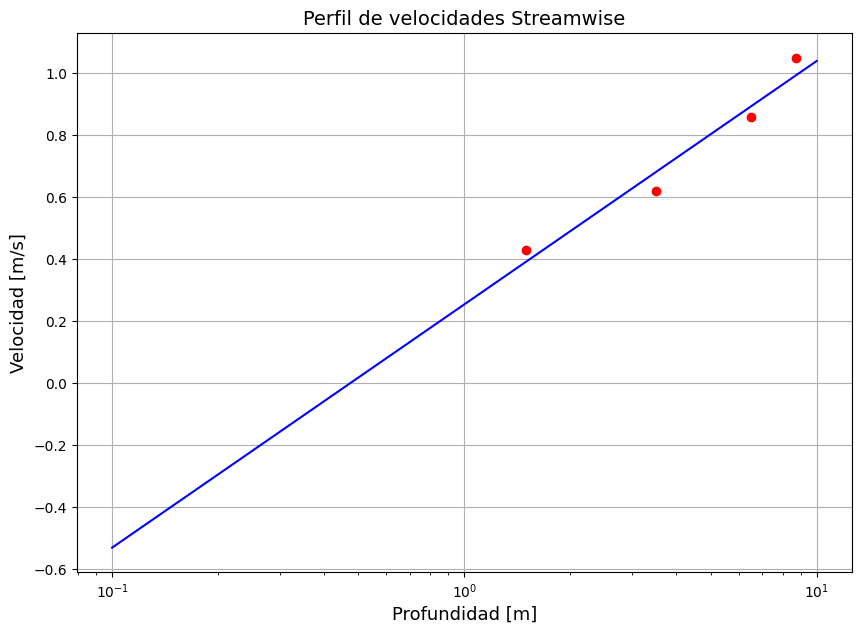

In [5]:
Pendiente=Coef_mod_lineal[1]
Ordenada=Coef_mod_lineal[0]

# Calculo de u* y A en funcion de la pendiente y la ordenada al origen de la recta ajustada
u_asterisco=Pendiente*k
A=(Ordenada/u_asterisco)-((1/k)*np.log(u_asterisco))
print(u_asterisco,A)

# Trazado de la ecuacion teorica ajustada (ecuaicon 7 del informe) con los datos observados
X_ajuste=np.linspace(0.1,10,10)
u_ajustado=(A*u_asterisco)+((u_asterisco/k)*(np.log(X_ajuste*u_asterisco/v)))
plt.figure(figsize=(10,7))
plt.semilogx(z,V,'o',color='red')
plt.semilogx(X_ajuste,u_ajustado,color='blue')
plt.title("Perfil de velocidades Streamwise",fontsize=14)
plt.grid()
plt.ylabel('Velocidad [m/s]',fontsize=13)
plt.xlabel('Profundidad [m]',fontsize=13)

In [6]:
# Calculo de la tension de corte de fondo
tao=(u_asterisco**2)*rho
print(tao)

18.579265910664486


In [7]:
# Calculo de la subcapa viscosa
delta=11.6*v/u_asterisco
print("Espesor de subcapa viscosa: "+str(round(delta*1000,3))+" mm")

Espesor de subcapa viscosa: 0.085 mm
